In [47]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.inspection

In [20]:
# Установка настроек вывода
np.set_printoptions(precision=4, suppress=True)

In [56]:
# Константы
SAMPLES=600
ANOMALIES=70

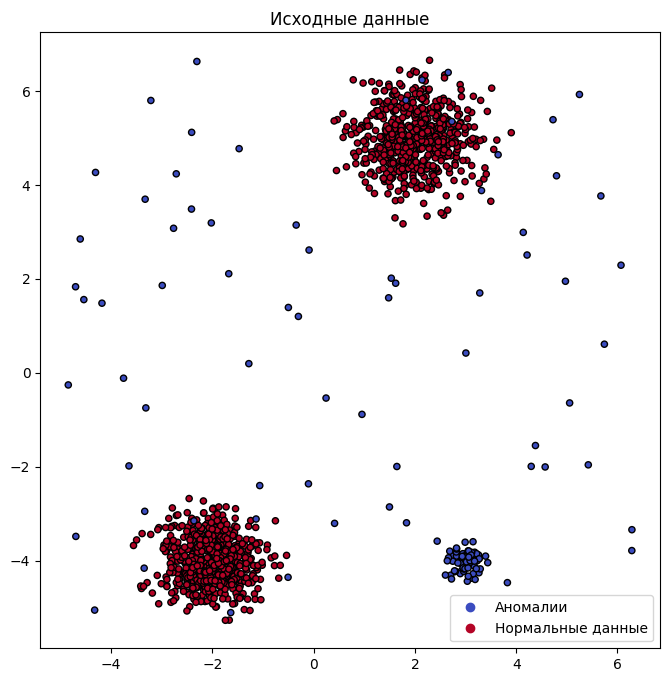

In [105]:
# Генерация собственных тестовых данных
rng = np.random.RandomState(0)

x1 = 0.6 * rng.randn(SAMPLES, 2) + np.array([2, 5])
x2 = 0.5 * rng.randn(SAMPLES, 2) + np.array([-2, -4])
anomalies = rng.uniform(low=np.min(np.append(x1, x2)), high=np.max(np.append(x1, x2)), size=(ANOMALIES, 2))
anomaly_cluster = 0.2 * rng.randn(ANOMALIES, 2) + np.array([3, -4])
#print(x1, x2, anomalies)

X = np.concatenate([x1, x2, anomalies, anomaly_cluster])
Y = np.concatenate([np.ones((2 * SAMPLES), dtype=int), -np.ones((2 * ANOMALIES), dtype=int)])

# Построение данных
plt.figure(figsize = (8, 8))
sc = plt.scatter(X[:, 0], X[:, 1], c = Y, s = 20, cmap = "coolwarm", edgecolor="#000000", marker = 'o')
handles, labels = sc.legend_elements()
plt.legend(handles = handles, labels=["Аномалии", "Нормальные данные"])
plt.title("Исходные данные")
plt.show()

X_trn, X_tst, Y_trn, Y_tst = sklearn.model_selection.train_test_split(X, Y, stratify=Y, random_state=0)

In [128]:
# Модель изоляционного леса и ее обучение
IFmodel = sklearn.ensemble.IsolationForest(max_samples=64, contamination=ANOMALIES/SAMPLES, random_state=0)
IFmodel.fit(X_trn)

IsolationForest(contamination=0.11666666666666667, max_samples=64,
                random_state=0)

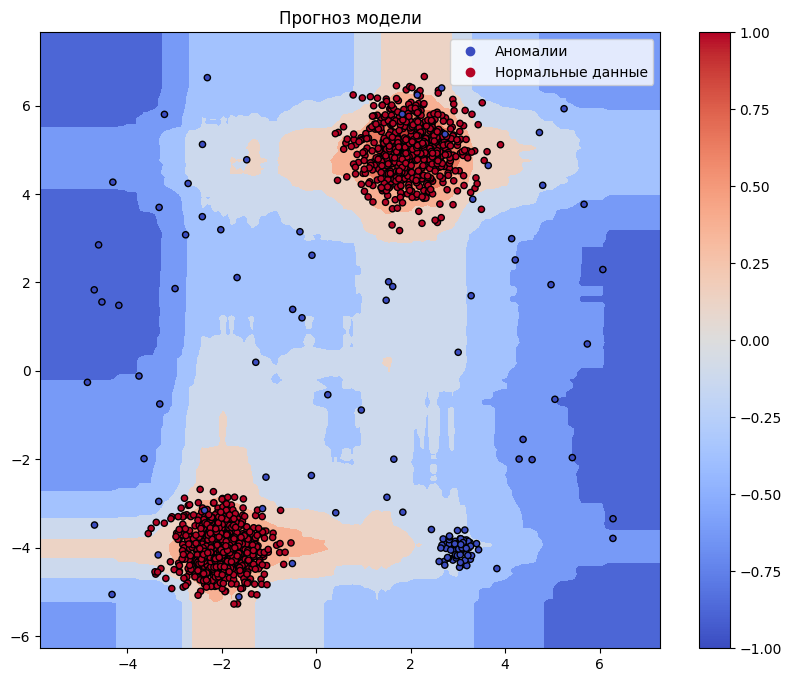

In [129]:
# Построение прогноза модели
PredDisplay = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
    IFmodel, X, grid_resolution = 150, plot_method = "contourf", response_method = "decision_function", 
    cmap = "coolwarm", alpha = 1)

PredDisplay.figure_.set_size_inches(10, 8)
PredDisplay.ax_.scatter(X[:, 0], X[:, 1], c = Y, s = 20, cmap = "coolwarm", edgecolor="#000000", marker = 'o')
PredDisplay.ax_.set_title("Прогноз модели")
plt.legend(handles = handles, labels = ["Аномалии", "Нормальные данные"])
plt.colorbar(PredDisplay.ax_.collections[1])
plt.show()

In [134]:
# AUC ROC (площадь под кривой рабочей характеристики приёмника (т.н. кривой ошибок))
Ypred = IFmodel.predict(X)
auc = sklearn.metrics.roc_auc_score(Y, Ypred)
print(auc)

0.9534523809523812


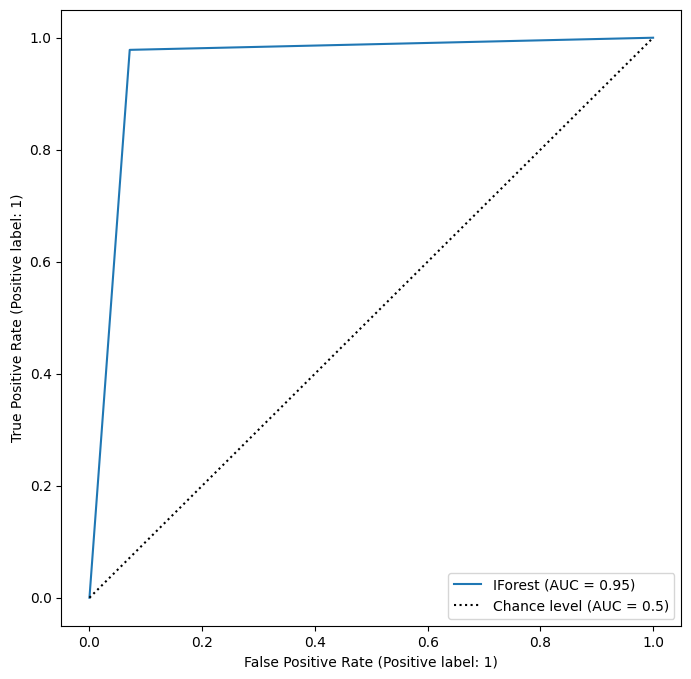

In [135]:
# Построение ROC
ROCDisplay = sklearn.metrics.RocCurveDisplay.from_predictions(
    Y, Ypred, pos_label=1, name="IForest", plot_chance_level=True, chance_level_kw={"linestyle": ":"})

ROCDisplay.figure_.set_size_inches(8, 8)
plt.show()

Уменьшение размеров сэмплов увеличивает AUC-ROC, contamination="auto" уменьшает AUC-ROC...